# Hierarchical clustering

<p style="font-family:verdana; font-size:15px">Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. See the Wikipedia page for more details.
</p>



<p style="font-family:verdana; font-size:15px">
The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:
</p>

<p style="font-family:verdana; font-size:15px">
<b>Ward linkage</b> minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.v
</p>
<p style="font-family:verdana; font-size:15px">
<b>Maximum or complete linkage</b> minimizes the maximum distance between observations of pairs of clusters.
</p>

<p style="font-family:verdana; font-size:15px">
<b>Average linkage</b> minimizes the average of the distances between all observations of pairs of clusters.
</p>
<p style="font-family:verdana; font-size:15px">
<b>Single linkage</b> minimizes the distance between the closest observations of pairs of clusters.
</p>
<p style="font-family:verdana; font-size:15px">
AgglomerativeClustering can also scale to large number of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.
</p>
![title](./images/Hclustering.png)

In [1]:
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs



#Generate data

def create_data(centers,num=100,std=0.7):
    X,labels_true = make_blobs(n_samples=num,centers=centers, cluster_std=std)
    return X,labels_true

#Plot data

def plot_data(*data):
    X,labels_true=data
    labels=np.unique(labels_true)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbycm'
    for i,label in enumerate(labels):
        position=labels_true==label
        ax.scatter(X[position,0],X[position,1],label="cluster %d"%label),
        color=colors[i%len(colors)]

    ax.legend(loc="best",framealpha=0.5)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[1]")
    ax.set_title("data")
    plt.show()


ARI:0.33266533066132264


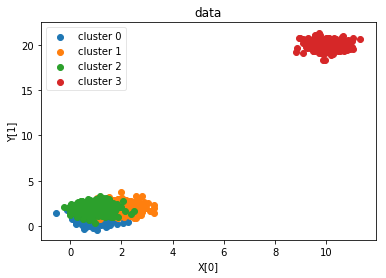

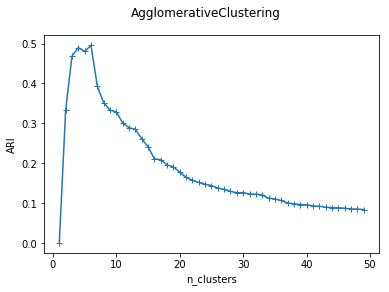

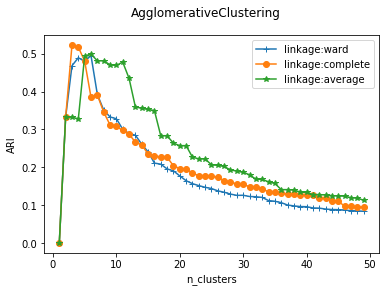

In [2]:

def test_AgglomerativeClustering(*data):
    X,labels_true=data
    clst=cluster.AgglomerativeClustering()
    predicted_labels=clst.fit_predict(X)
    print("ARI:%s"% adjusted_rand_score(labels_true, predicted_labels))

#effect of cluster number

def test_AgglomerativeClustering_nclusters(*data):
    X,labels_true=data
    nums=range(1,50)
    ARIS=[]
    for num in nums:
        clst=cluster.AgglomerativeClustering(n_clusters=num)
        predicted_lables=clst.fit_predict(X)
        ARIS.append(adjusted_rand_score(labels_true, predicted_lables)) 

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(nums,ARIS,marker="+")
    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    fig.suptitle("AgglomerativeClustering")
    plt.show()   

#effect of linkage   
def test_agglomerativeClustering_linkage(*data):
    X,labels_true=data
    nums=range(1,50)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    linkages=['ward','complete','average']
    markers="+o*"
    for i,linkage in enumerate(linkages): 
        ARIs=[]
        for num in nums:
            clst=cluster.AgglomerativeClustering(n_clusters=num,linkage=linkage)
            predicted_labels=clst.fit_predict(X)
            ARIs.append(adjusted_rand_score(labels_true, predicted_labels))
        ax.plot(nums,ARIs,marker=markers[i],label="linkage:%s"%linkage)

    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    ax.legend(loc="best")
    fig.suptitle("AgglomerativeClustering")
    plt.show()
centers=[[1,1],[2,2],[1,2],[10,20]]
X,labels_true=create_data(centers, 1000, 0.5)
test_AgglomerativeClustering(X,labels_true)
plot_data(X,labels_true)
test_AgglomerativeClustering_nclusters(X,labels_true)
test_agglomerativeClustering_linkage(X,labels_true)
